In [1]:
import numpy as np
import pandas as pd
import os
import re
import csv
import matplotlib.pyplot as plt

In [ ]:
base_path = ""
all_folders = os.listdir(base_path)

numeric_folders = sorted(
    [folder for folder in all_folders if folder.replace('.', '').isdigit()],
    key=lambda x: float(x)
)

output_dir = ""
os.makedirs(output_dir, exist_ok=True)

for folder in numeric_folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        u_file_path = os.path.join(folder_path, "vorticity")
        if os.path.isfile(u_file_path):
            with open(u_file_path, 'r') as file:
                lines = file.readlines()
                ux_data = []
                in_data_section = False
                
                for line in lines:
                    line = line.strip()
                    if line.startswith("internalField"):
                        in_data_section = True
                        continue
                    if in_data_section:
                        if line.startswith(")"):
                            break
                        match = re.match(r"\(([\d\-eE.+]+) [\d\-eE.+]+ [\d\-eE.+]+\)", line)
                        if match:
                            ux = float(match.group(1)) 
                            ux_data.append(ux)

                csv_file = os.path.join(output_dir, f"{folder}_vor_data.csv")
                with open(csv_file, "w", newline="") as csvfile:
                    writer = csv.writer(csvfile)
                    writer.writerow(["vorticity"])
                    writer.writerows([[value] for value in ux_data])
                print(f"Saved {len(ux_data)} entries for folder {folder} to {csv_file}")

def load_csv_data(folder_name):
    csv_file = os.path.join(output_dir, f"{folder_name}_vor_data.csv")
    if os.path.isfile(csv_file):
        data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
        return data
    else:
        print(f"No data file found for folder: {folder_name}")
        return None

folder_to_process = "0.2"
ux_data = load_csv_data(folder_to_process)
if ux_data is not None:
    print(f"Loaded {len(vor_data)} entries from folder {folder_to_process}")
    print(f"Average ux: {np.mean(vor_data):.6f}")


11534336


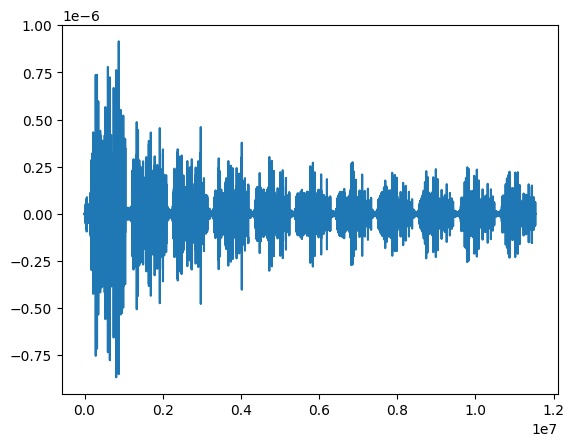

In [42]:
files = [
    'Desktop/proceed_data/proceed_data_v_10/processed_data_vor/0.2_vor_data.csv',
    'Desktop/proceed_data/proceed_data_v_10/processed_data_vor/5_vor_data.csv',
    'Desktop/proceed_data/proceed_data_v_10/processed_data_vor/10_vor_data.csv',
    'Desktop/proceed_data/proceed_data_v_10/processed_data_vor/15_vor_data.csv',
    'Desktop/proceed_data/proceed_data_v_10/processed_data_vor/20_vor_data.csv',
    'Desktop/proceed_data/proceed_data_v_10/processed_data_vor/25_vor_data.csv',
    'Desktop/proceed_data/proceed_data_v_10/processed_data_vor/30_vor_data.csv',
    'Desktop/proceed_data/proceed_data_v_10/processed_data_vor/35_vor_data.csv',
    'Desktop/proceed_data/proceed_data_v_10/processed_data_vor/40_vor_data.csv',
    'Desktop/proceed_data/proceed_data_v_10/processed_data_vor/45_vor_data.csv',
    'Desktop/proceed_data/proceed_data_v_10/processed_data_vor/50_vor_data.csv'
]

# files = [
#     'Desktop/proceed_data/proceed_data_v_10/processed_data/0_ux_data.csv',
#     'Desktop/proceed_data/proceed_data_v_10/processed_data/20_ux_data.csv',
#     'Desktop/proceed_data/proceed_data_v_10/processed_data/25_ux_data.csv',
#     'Desktop/proceed_data/proceed_data_v_10/processed_data/30_ux_data.csv',
#     'Desktop/proceed_data/proceed_data_v_10/processed_data/35_ux_data.csv',
#     'Desktop/proceed_data/proceed_data_v_10/processed_data/40_ux_data.csv',
#     'Desktop/proceed_data/proceed_data_v_10/processed_data/45_ux_data.csv'
# ]
DataNum = len(files)

all_data=[]

for file in files:
    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values
    all_data.extend(data.tolist())

x = np.linspace(0, len(data)*DataNum, len(data)*DataNum)
print(len(all_data))
plt.plot(x, all_data)

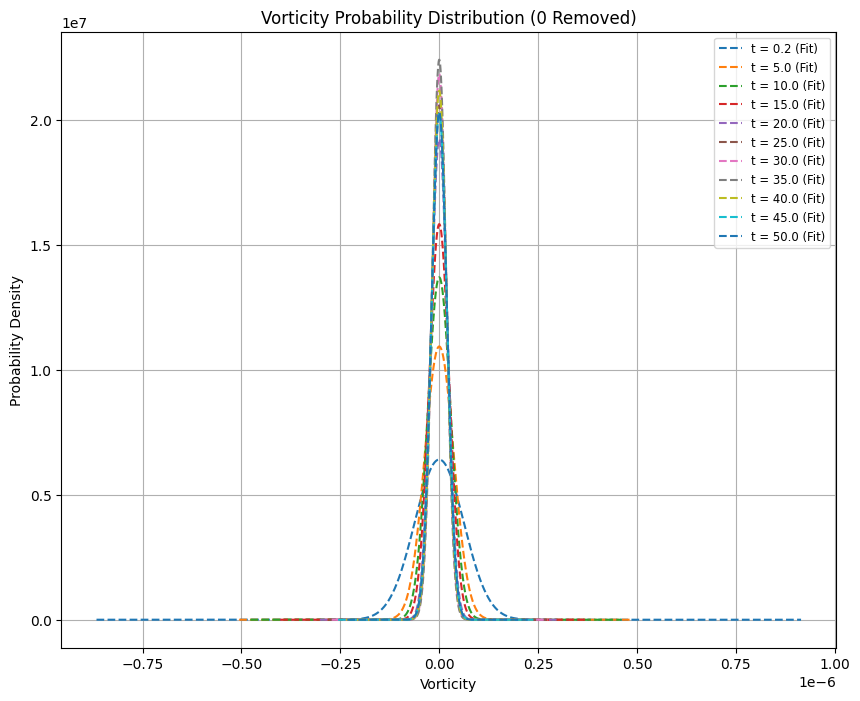

Time (t)   |   Standard Deviation
--------------------------------------
t = 0.2     |   Sigma = 0.0000000622
t = 5.0     |   Sigma = 0.0000000365
t = 10.0    |   Sigma = 0.0000000291
t = 15.0    |   Sigma = 0.0000000252
t = 20.0    |   Sigma = 0.0000000207
t = 25.0    |   Sigma = 0.0000000194
t = 30.0    |   Sigma = 0.0000000183
t = 35.0    |   Sigma = 0.0000000178
t = 40.0    |   Sigma = 0.0000000188
t = 45.0    |   Sigma = 0.0000000197
t = 50.0    |   Sigma = 0.0000000196


[(0.2, 9.83698343355768e-17),
 (5.0, 2.5886794678396716e-16),
 (10.0, 3.7513710374523316e-16),
 (15.0, -2.1046263496784653e-17),
 (20.0, -6.40672312781475e-17),
 (25.0, 2.2357586554082128e-16),
 (30.0, 3.900716915631559e-17),
 (35.0, 2.804075866032134e-17),
 (40.0, -2.4189527532870974e-17),
 (45.0, -2.7598930591155066e-17),
 (50.0, 1.4224345214921773e-16)]

In [50]:
from scipy.stats import norm
from scipy.stats import entropy

std_devs = []
mean_devs = []
entropies = []
time = []
sigma = []

plt.figure(figsize=(10, 8))

for file in files:
    t = float(file.split('/')[-1].split('_')[0])

    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values  # NaN 제거

    data = data[data != 0]

    # histogram
    #plt.hist(data, bins=100, density=True, alpha=0.4, label=f"t = {t}")
    # 히스토그램 계산
    hist, bin_edges = np.histogram(data, bins=50, density=True)

    # 엔트로피 계산
    H = entropy(hist)
    time.append(t)
    
    entropies.append(H)
    mean, std = norm.fit(data)
    std_devs.append((t, std))
    sigma.append(std)
    mean_devs.append((t, mean))
    x = np.linspace(data.min(), data.max(), 1000)
    pdf = norm.pdf(x, mean, std)
    plt.plot(x, pdf, linestyle='--', label=f"t = {t} (Fit)")

plt.title("Vorticity Probability Distribution (0 Removed)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")
mean_devs

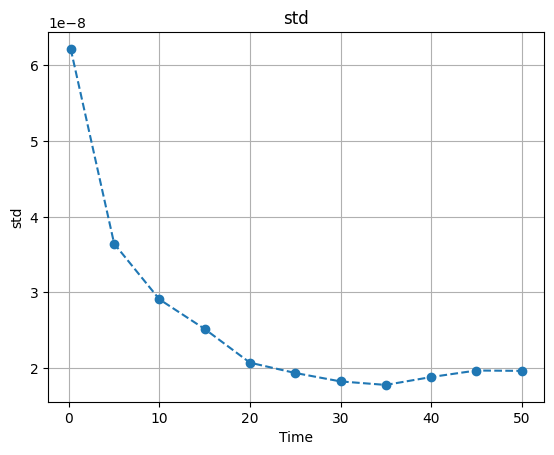

In [51]:
plt.plot(time, sigma, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

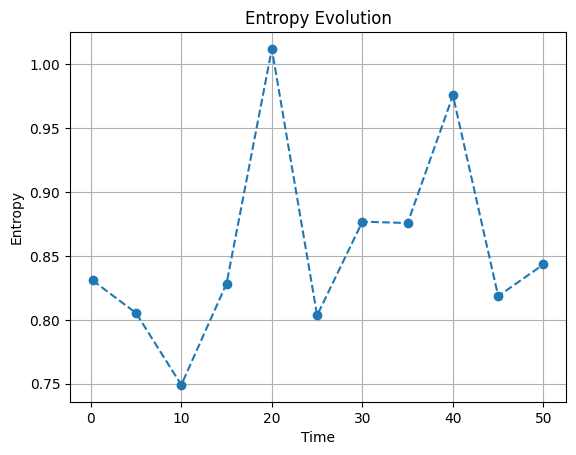

In [45]:
# 엔트로피 변화 시각화
plt.plot(time, entropies, marker='o', linestyle='--')
plt.title("Entropy Evolution")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()